In [1]:
xx = [98.60993134772366, 94.08851861108106, 88.3214784903548, 97.79636790772726, 97.44826499399421, 98.10795423301109, 99.46952004836804, 97.28793573245753, 95.15107660602759, 98.62195333173717, 98.16203829441535, 98.78163349316684, 94.57271452396748, 98.25264620610778, 92.81272556625235, 98.81507319551666, 97.3788383219336, 97.57620926685681, 95.6325952525343, 95.91893684111093, 98.99550643584098, 97.0007638753343, 98.61772888595442, 96.52418182580443, 96.54356489279283, 98.35338686265914, 92.67466686358769, 98.40578637760704]
countries = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland', 
     'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg',
     'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'United Kingdom']
accuracies = list(map(lambda x: x / 100, xx))
print('Number of accuracies: ', len(accuracies))
print('Number of countries: ', len(countries))

Number of accuracies:  28
Number of countries:  28


In [2]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
# plt.xlabel('feature no.')
# plt.ylabel('feature value')
# plt.scatter(np.arange(0, X_train.shape[1]), X_train[3])
# plt.savefig('feature_scatter.pdf')
ax.set_xlim(0.85, 1.0)
# y_pos = np.linspace(0, 1, num=len(countries))
y_pos = np.arange(len(countries))
print(y_pos)
print(accuracies)
ax.barh(y_pos, accuracies)
ax.set_yticks(y_pos)
ax.set_yticklabels(countries, fontsize=20)
ax.xaxis.set_tick_params(labelsize=20)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Accuracy', fontsize=20)

plt.savefig('eu-accuracies.pdf')
plt.show()

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]
[0.9860993134772366, 0.9408851861108105, 0.8832147849035481, 0.9779636790772726, 0.9744826499399422, 0.9810795423301109, 0.9946952004836804, 0.9728793573245753, 0.9515107660602758, 0.9862195333173718, 0.9816203829441535, 0.9878163349316683, 0.9457271452396747, 0.9825264620610779, 0.9281272556625235, 0.9881507319551666, 0.973788383219336, 0.9757620926685681, 0.956325952525343, 0.9591893684111094, 0.9899550643584099, 0.970007638753343, 0.9861772888595443, 0.9652418182580443, 0.9654356489279283, 0.9835338686265913, 0.9267466686358768, 0.9840578637760704]


<Figure size 1000x1000 with 1 Axes>

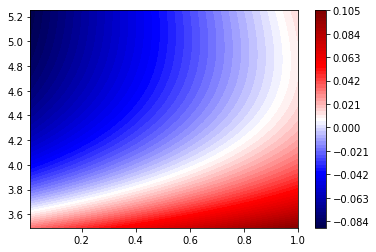

In [3]:
hdi_xx = np.linspace(0.01, 1, 100)
productivity_yy = np.linspace(3.49, 5.25, 100)

X, Y = np.meshgrid(hdi_xx, productivity_yy)

def feature_scaling(xx):
    return (xx - np.min(xx)) / (np.max(xx) - np.min(xx))

def fs(xx):
    a = -0.1
    b = 0.1
    return (b - a) * feature_scaling(xx) + a

def model_1_dy(xx, yy):
    return 4199 / (yy ** 2) - 0.32 / (xx ** 3)

def model_log_dProd(xx, yy):
    return 0.02 * xx * yy - 8.2 / (yy ** 2) + 30 / (yy ** 3)

def model_log_dHDI(xx, yy):
    return 0.0011 * xx * yy - 0.023 / (xx ** 2) + 0.02 / (xx ** 3) 

def model_2_dy():
    pass

def model_from_paper_dy(xx, yy):
    return 0.11 * (xx**3) - 0.067 * (yy / xx)

def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

# Z_model_1_dy = model_1_dy(X, Y)
Z_model_log_dHDI = model_log_dHDI(X, Y)
Z_model_log_dProd = model_log_dProd(X, Y)

# gdp = np.linspace(0.58, 0.9, 10000)
# demo = np.linspace(0.01, 1.01, 100)
# X, Y = np.meshgrid(gdp, demo)
# Z_model_from_paper = fs(model_from_paper_dy(X, Y))
# Z = f(xx, yy)
# print(Z_model_1_dy)
# Z_model_1_dy = fs(Z_model_1_dy)
# print(np.max(Z_model_1_dy), np.min(Z_model_1_dy))
# plt.contour(X, Y, Z_model_1_dy, 20, cmap='RdGy')
# plt.contourf(X, Y, Z_model_1_dy, 70, cmap='seismic')
# plt.contourf(X, Y, Z_model_log_dHDI, 70, cmap='seismic')
# plt.colorbar()
plt.contourf(X, Y, Z_model_log_dProd, 70, cmap='seismic')
plt.colorbar()